In [1]:
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from cpmix_utils import weight_fun, calc_weights, calc_min_distances_discrete, calculate_metrics

In [3]:
ls ../monit_npy/

nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_1/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_10/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_11/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_12/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_13/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_14/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_15/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_16/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_17/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_18/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_19/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_20/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_22/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_23/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_24/
nn_rhorho_Varian

In [5]:
filenames = ['../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{}'.format(i) for i in range(2,51)]

In [6]:
def get_filename_for_class(class_num, subset=None):
    d = '../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{}'.format(class_num)
    if subset:
        d += "_WEIGHTS_SUBS" + str(subset)
    return d

In [7]:
ls ../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_50

softmax_calc_w.npy  softmax_preds_w.npy


In [8]:
filenames[0]

'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2'

In [10]:
def calculate_metrics_for_numclass(directory, num_class):
    try:
        calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
        preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
        return calculate_metrics(num_class, calc_w, preds_w)
    except Exception:
        return None

In [11]:
metrics = [calculate_metrics_for_numclass(filenames[i], i+2) for i in range(49)]

In [12]:
print metrics

[array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 3.33338981e-09, 3.20514452e-07]), array([0.80355   , 1.        , 1.        , 1.        , 0.19645   ,
       0.08372909, 0.11921725]), array([0.72748   , 1.        , 1.        , 1.        , 0.27252   ,
       0.06311178, 0.08447197]), array([0.66552   , 0.96428   , 1.        , 1.        , 0.3702    ,
       0.05048819, 0.06713378]), array([0.61338   , 0.9413    , 1.        , 1.        , 0.44532   ,
       0.04188546, 0.05515874]), array([0.56065   , 0.91737   , 0.98059   , 1.        , 0.54139   ,
       0.0358934 , 0.04724399]), array([0.51258   , 0.88632   , 0.96048   , 1.        , 0.64062   ,
       0.03194998, 0.0418371 ]), array([0.47127   , 0.8642    , 0.94761   , 0.98514   , 0.73178   ,
       0.02830128, 0.03690547]), array([0.43821   , 0.83474   , 0.93032   , 0.97181   , 0.82492   ,
       0.02576307, 0.03355283]), array([0.40501   , 0.804     , 0.91306   , 0.958     , 0.93255   ,
    

In [14]:
metrics = np.stack([np.zeros(7, dtype=float) if x is None else x for x in metrics])

In [11]:
np.save( 'metrics_multiclass.npy', metrics,)

# Accuracy

Text(0,0.5,'Accuracy')

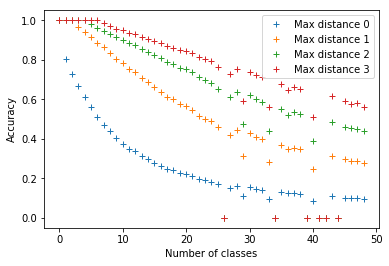

In [15]:
plt.plot(metrics[:, 0],'+', label='Max distance 0')
plt.plot(metrics[:, 1],'+', label='Max distance 1')
plt.plot(metrics[:, 2],'+', label='Max distance 2')
plt.plot(metrics[:, 3],'+', label='Max distance 3')
plt.legend(loc='upper right')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')

Text(0,0.5,'Accuracy in distance of pi/5')

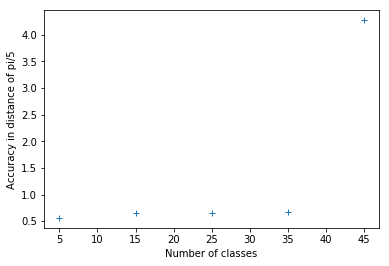

In [22]:
# Accuracy in terms of absolute distance.
number_of_classes = [5, 15, 25, 35, 45]
in_dist_0 = [metrics[x, x // 10] for x in number_of_classes]
plt.plot(number_of_classes, in_dist_0, '+')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy in distance of pi/5')

# Looks like number of classes does not help in terms of this metric.

# Mean error

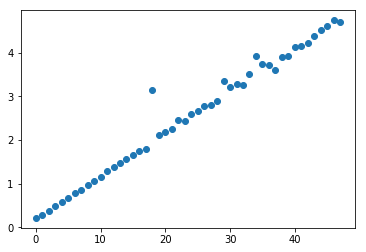

In [13]:
plt.plot(metrics[1:, 4], 'o')



# L1 Distance

Text(0,0.5,'l1')

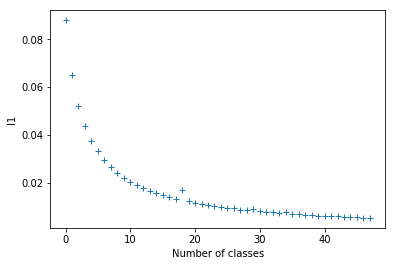

In [14]:
plt.plot(metrics[1:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 Distance

Text(0,0.5,'l2')

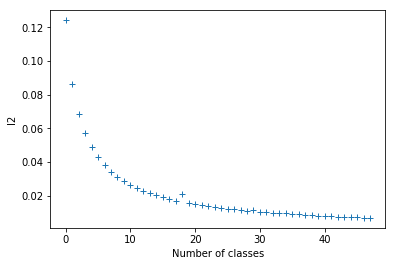

In [15]:
plt.plot(metrics[1:, 6], '+')
plt.xlabel("Number of classes")
plt.ylabel('l2')

# ROC AUC score

In [16]:
from sklearn.metrics import roc_auc_score
def calculate_roc_auc(pred_w, calc_w, index_a, index_b):
    n, num_classes = calc_w.shape
    true_labels = np.concatenate([np.ones(n), np.zeros(n)])
    preds = np.concatenate([pred_w[:, index_a], pred_w[:, index_a]])
    weights = np.concatenate([calc_w[:, index_a], calc_w[:, index_b]])

    return roc_auc_score(true_labels, preds, sample_weight=weights)

In [17]:
def test_roc_auc(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    for i in range(0, num_class):
         print(i, 'roc_auc: {}'.format(calculate_roc_auc(preds_w, calc_w, 0, i)), 'maxroc_auc: {}'.format(calculate_roc_auc(calc_w, calc_w, 0, i)))

In [18]:
i = 21
test_roc_auc(get_filename_for_class(i), i)

0 roc_auc: 0.5000000000000004 maxroc_auc: 0.5000000000000102
1 roc_auc: 0.5043273048019564 maxroc_auc: 0.505715103706892
2 roc_auc: 0.5157686018206398 maxroc_auc: 0.5224470536108253
3 roc_auc: 0.5331939212487248 maxroc_auc: 0.5485427621387747
4 roc_auc: 0.5548875781537895 maxroc_auc: 0.5814323630193214
5 roc_auc: 0.578719927419587 maxroc_auc: 0.6178866679725444
6 roc_auc: 0.6023581559599771 maxroc_auc: 0.6543369626140604
7 roc_auc: 0.6234945971232256 maxroc_auc: 0.6872244359864048
8 roc_auc: 0.6400702436905967 maxroc_auc: 0.7133450183653228
9 roc_auc: 0.6504724937460067 maxroc_auc: 0.7301572263494819
10 roc_auc: 0.6536892207764278 maxroc_auc: 0.7360250862136876
11 roc_auc: 0.6494055204246585 maxroc_auc: 0.7303745760743253
12 roc_auc: 0.6380345446021924 maxroc_auc: 0.7137496733185276
13 roc_auc: 0.6206794027803705 maxroc_auc: 0.6877625770992603
14 roc_auc: 0.5990289744981194 maxroc_auc: 0.6549416675781581
15 roc_auc: 0.5751963930775128 maxroc_auc: 0.6184898953805829
16 roc_auc: 0.551514

In [19]:
i = 21
test_roc_auc(get_filename_for_class(i), i)

0 roc_auc: 0.5000000000000004 maxroc_auc: 0.5000000000000102
1 roc_auc: 0.5043273048019564 maxroc_auc: 0.505715103706892
2 roc_auc: 0.5157686018206398 maxroc_auc: 0.5224470536108253
3 roc_auc: 0.5331939212487248 maxroc_auc: 0.5485427621387747
4 roc_auc: 0.5548875781537895 maxroc_auc: 0.5814323630193214
5 roc_auc: 0.578719927419587 maxroc_auc: 0.6178866679725444
6 roc_auc: 0.6023581559599771 maxroc_auc: 0.6543369626140604
7 roc_auc: 0.6234945971232256 maxroc_auc: 0.6872244359864048
8 roc_auc: 0.6400702436905967 maxroc_auc: 0.7133450183653228
9 roc_auc: 0.6504724937460067 maxroc_auc: 0.7301572263494819
10 roc_auc: 0.6536892207764278 maxroc_auc: 0.7360250862136876
11 roc_auc: 0.6494055204246585 maxroc_auc: 0.7303745760743253
12 roc_auc: 0.6380345446021924 maxroc_auc: 0.7137496733185276
13 roc_auc: 0.6206794027803705 maxroc_auc: 0.6877625770992603
14 roc_auc: 0.5990289744981194 maxroc_auc: 0.6549416675781581
15 roc_auc: 0.5751963930775128 maxroc_auc: 0.6184898953805829
16 roc_auc: 0.551514

## Baseline

In [20]:
i = 21
subset = [0,6] # Run with option --WEIGHTS_SUBSET [0,6]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999933 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.6639896560945292 maxroc_auc: 0.6454566069027331


In [21]:
i = 21
subset = [0,10] # Run with option --WEIGHTS_SUBSET [0,10]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.5000000000000063 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.701805957934322 maxroc_auc: 0.7221783356452286


In [22]:
i = 21
subset = [0,2] # Run with option --WEIGHTS_SUBSET [0,2]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999986 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.5568512762550901 maxroc_auc: 0.521384294099431


In [23]:
i = 21
subset = [0,8] # Run with option --WEIGHTS_SUBSET [0,8]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999992 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.6897154024886555 maxroc_auc: 0.7009590049115341


# Accuracy distance

In [42]:
def plot_distr(directory, num_class):
    from scipy.stats import norm
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    min_distances = calc_min_distances_discrete(pred_arg_maxs, calc_arg_maxs, num_class)
    bins = np.array(list(range(int(np.min(min_distances)), int(np.max(min_distances)+2)))) -0.5
    mu, std = norm.fit(zip(bins, min_distances))
    print "mu = {} ::: std = {}".format(mu, std)
    plt.hist(min_distances, bins=bins, histtype='step')
    # xmin, xmax = plt.xlim()
    # x = np.linspace(xmin, xmax, 100)
    # p = norm.pdf(x, mu, std)
    # plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Prediction error distance')
    

mu = 0.9 ::: std = 6.91001688372


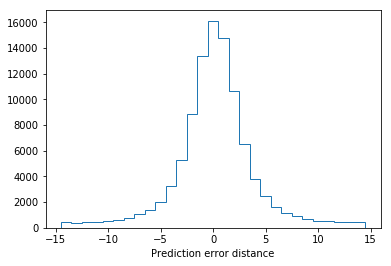

In [43]:
i = 30
plot_distr(get_filename_for_class(i), i)

mu = 0.895833333333 ::: std = 10.4557392201


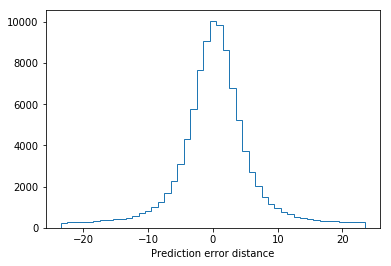

In [44]:
i = 48
plot_distr(get_filename_for_class(i), i)

mu = 0.0833333333333 ::: std = 1.3667682889


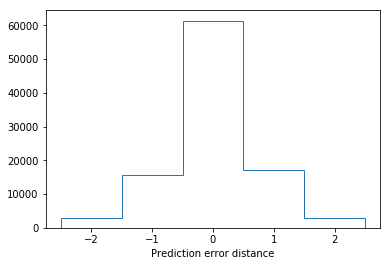

In [48]:
i = 6
plot_distr(get_filename_for_class(i), i)

mu = -0.578125 ::: std = 7.08388286778


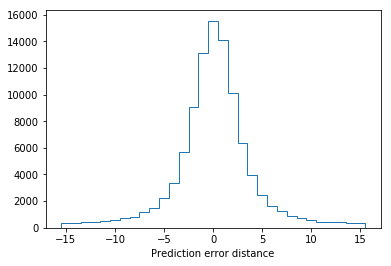

In [46]:
i = 32
plot_distr(get_filename_for_class(i), i)

mu = -0.0625 ::: std = 9.26329281357


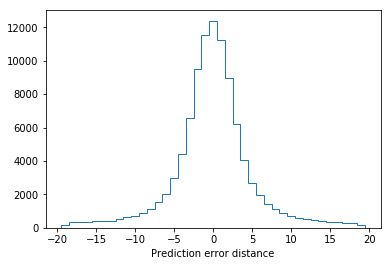

In [47]:
i = 39
plot_distr(get_filename_for_class(i), i)